In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd

In [2]:
path = Path('/home/jupyter/.fastai/data/food-101/food-101')
df_train_total = pd.read_csv(path/'train.csv')
df_train_total['is_valid'] = 0
df_test = pd.read_csv(path/'test.csv')
df_test['is_valid'] = 1

In [3]:
data = (ImageList
        .from_csv(path,'part-train-seed47.csv',folder='images')
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
        .transform(get_transforms(),size=128)
        .databunch(bs=64,num_workers=8)
        .normalize(imagenet_stats)
)

In [5]:
loss_func = LabelSmoothingCrossEntropy()

In [7]:
learn = cnn_learner(data,models.resnet50,metrics=[accuracy,top_k_accuracy],loss_func=loss_func).mixup()

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-02
Min loss divided by 10: 5.75E-03


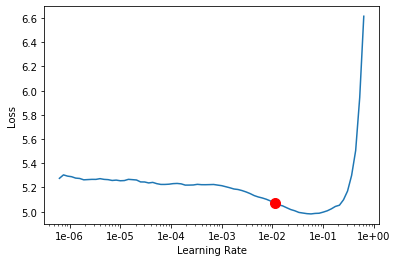

In [9]:
learn.recorder.plot(suggestion=True)

In [10]:
lr = 1e-2/2
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,3.638979,2.724877,0.431604,0.727842,04:49
1,3.321029,2.381054,0.530416,0.813901,02:15
2,3.121232,2.176916,0.596634,0.849347,02:16
3,3.042474,2.080483,0.627525,0.868317,02:16
4,2.935227,2.051962,0.636752,0.872515,02:16


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


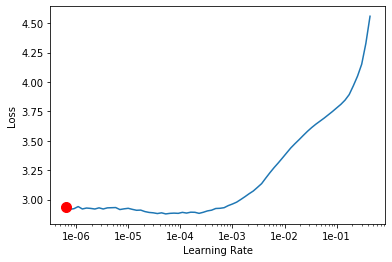

In [12]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.25E-06


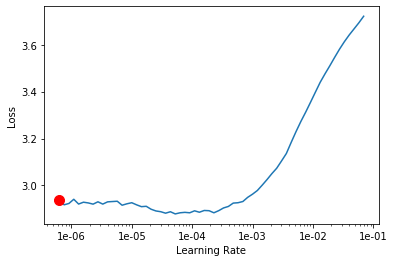

In [13]:
learn.recorder.plot(suggestion=True,skip_end=15)

In [14]:
learn.fit_one_cycle(10,slice(1e-5,lr/5))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.928289,1.981686,0.654099,0.882257,02:17
1,2.876122,1.926602,0.670772,0.889743,02:18
2,2.818391,1.868983,0.679564,0.898257,02:18
3,2.716929,1.795234,0.703564,0.909545,02:17
4,2.600085,1.716075,0.723089,0.917307,02:18
5,2.515048,1.661209,0.734772,0.923762,02:17
6,2.381810,1.606566,0.753901,0.931248,02:17
7,2.315293,1.577988,0.763762,0.934178,02:17
8,2.262375,1.562014,0.768554,0.936079,02:17
9,2.207628,1.558456,0.770772,0.936673,02:17


In [15]:
learn.save('stage-2-224-mixup')

In [17]:
data = (ImageList
        .from_csv(path,'part-train-seed47.csv',folder='images')
        .split_from_df(col='is_valid')
        .label_from_df(cols='label')
        .transform(get_transforms(),size=224)
        .databunch(bs=64,num_workers=8)
        .normalize(imagenet_stats)
)

In [18]:
learn.data = data

In [19]:
learn.data

ImageDataBunch;

Train: LabelList (37875 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
apple_pie,apple_pie,apple_pie,apple_pie,apple_pie
Path: /home/jupyter/.fastai/data/food-101/food-101;

Test: None

In [20]:
learn.freeze_to(-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 7.59E-04


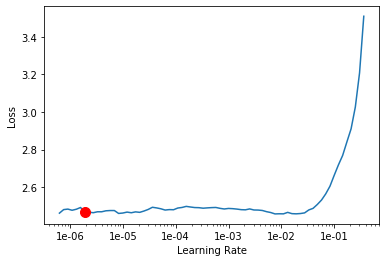

In [21]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

Min numerical gradient: 1.91E-06
Min loss divided by 10: 7.59E-04


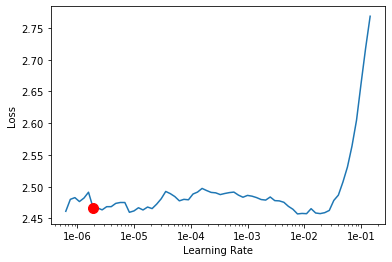

In [23]:
learn.recorder.plot(suggestion=True,skip_end=10)

In [24]:
lr = 1e-3
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.354510,1.486578,0.799406,0.949703,03:32
1,2.290948,1.440261,0.814535,0.956158,03:31
2,2.272670,1.429957,0.817109,0.955010,03:31
3,2.258475,1.420917,0.818337,0.955881,03:31
4,2.237560,1.420327,0.819683,0.956158,03:31


In [25]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 9.12E-08


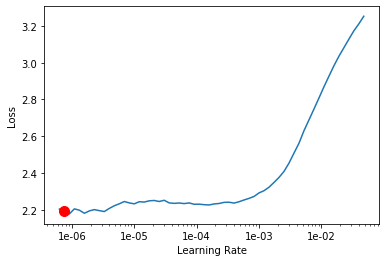

In [28]:
learn.recorder.plot(suggestion=True,skip_end=15)

In [29]:
learn.fit_one_cycle(15,slice(1e-7,lr/5))

epoch,train_loss,valid_loss,accuracy,top_k_accuracy,time
0,2.234944,1.419672,0.820317,0.956515,04:16
1,2.260288,1.414136,0.821109,0.957188,04:16
2,2.230201,1.411413,0.822614,0.957663,04:16
3,2.228343,1.405700,0.824317,0.957980,04:17
4,2.202200,1.399744,0.826020,0.958653,04:16
5,2.203093,1.391104,0.828238,0.958931,04:16
6,2.198339,1.389151,0.828158,0.959446,04:16
7,2.172014,1.384878,0.828475,0.959762,04:16
8,2.186901,1.382398,0.829822,0.960040,04:16
9,2.148023,1.378640,0.831564,0.960396,04:16


# Fin
Mixup label smoothing dev